
Го избрав множество со име „World Bank Youth Unemployment Rates“, кое може да го погледнете на следниов линк: https://www.kaggle.com/sovannt/world-bank-youth-unemployment

Content
This dataset contains youth unemployment rates (% of total labor force ages 15-24) Latest data available from 2010 to 2014.



### **World Bank Youth Unemployment Rates**






Katerina Donkova 183123

# 1.Предпроцесирање на податоците

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
import missingno as msno


#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Моделирање
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,IncrementalPCA

#Друго
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
#Читање на податоците
data=pd.read_csv("/content/drive/MyDrive/dataa.csv")
data.head()


Country Name Country Code       2010       2011       2012  \
0           Afghanistan          AFG  20.600000  20.900000  19.700001   
1                Angola          AGO  10.800000  10.700000  10.700000   
2               Albania          ALB  25.799999  27.000000  28.299999   
3            Arab World          ARB  25.022214  28.117516  29.113212   
4  United Arab Emirates          ARE   9.800000   9.800000   9.800000   

        2013       2014  
0  21.100000  20.799999  
1  10.600000  10.500000  
2  28.700001  29.200001  
3  29.335306  29.704569  
4   9.900000  10.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  219 non-null    object 
 1   Country Code  219 non-null    object 
 2   2010          219 non-null    float64
 3   2011          219 non-null    float64
 4   2012          219 non-null    float64
 5   2013          219 non-null    float64
 6   2014          219 non-null    float64
dtypes: float64(5), object(2)
memory usage: 12.1+ KB


In [ ]:
#Пресметка на средна вредност,мин,макс и ст.дев
print('Mean:\n{}'.format(data.mean()))
print('\n Min: \n{}'.format(data.min()))
print('\n Max:\n{}'.format(data.max()))
print('\n Std.dev: \n{}'.format(data.std()))

Mean:
2010    17.892957
2011    17.902713
2012    18.148142
2013    18.100429
2014    17.943539
dtype: float64

 Min: 
Country Name    Afghanistan
Country Code            AFG
2010                    0.7
2011                    0.7
2012                    0.5
2013                    0.7
2014                    0.7
dtype: object

 Max:
Country Name     Zimbabwe
Country Code          ZWE
2010            57.200001
2011            57.099998
2012            61.700001
2013                 58.0
2014            57.900002
dtype: object

 Std.dev: 
2010    10.540099
2011    10.887558
2012    11.430862
2013    11.674366
2014    11.554674
dtype: float64


In [ ]:
data['Country Name'].value_counts()

Afghanistan                               1
OECD members                              1
Malawi                                    1
Malaysia                                  1
North America                             1
                                         ..
High income                               1
Hong Kong SAR, China                      1
Honduras                                  1
Heavily indebted poor countries (HIPC)    1
Zimbabwe                                  1
Name: Country Name, Length: 219, dtype: int64

Вредноста за полето 'Country Name' е иста (1) и не влијае на моделирањето.

# 2.Exploratory Data Analysis

In [ ]:
print('Null values: \n{}'.format(data.isnull().sum()))
print('\nNaN values: \n{}'.format(data.isna().sum()))

Null values: 
Country Name    0
Country Code    0
2010            0
2011            0
2012            0
2013            0
2014            0
dtype: int64

NaN values: 
Country Name    0
Country Code    0
2010            0
2011            0
2012            0
2013            0
2014            0
dtype: int64


In [ ]:
data.duplicated().sum()

0

-Не постојат такви вредности

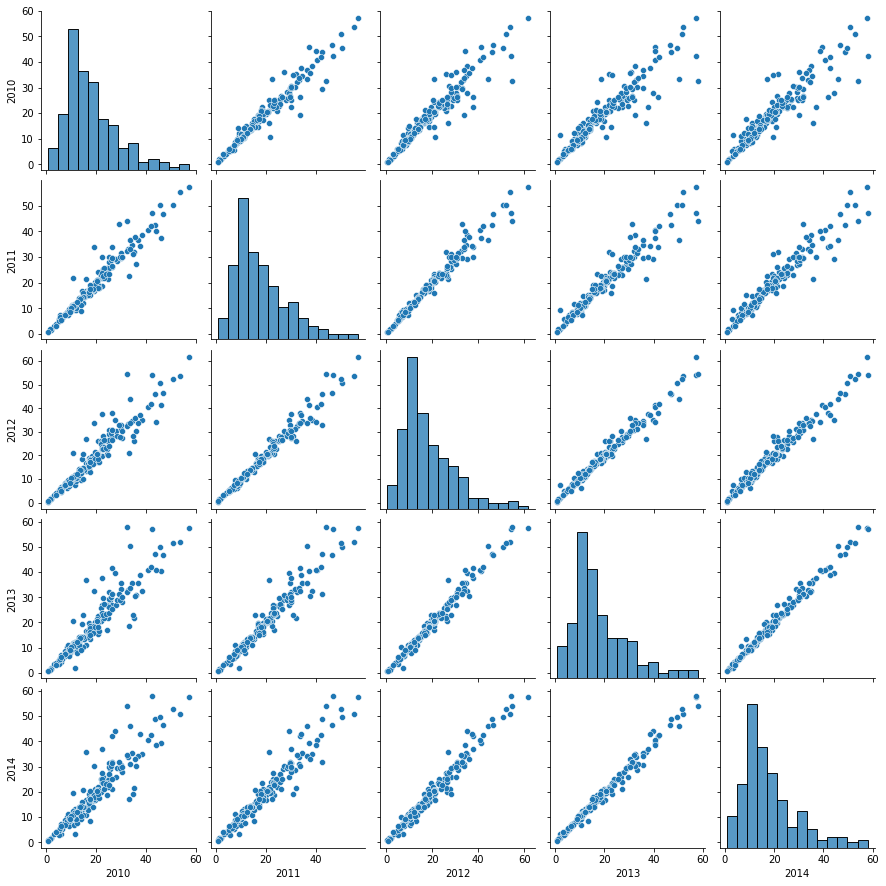

In [ ]:
sns.pairplot(data)


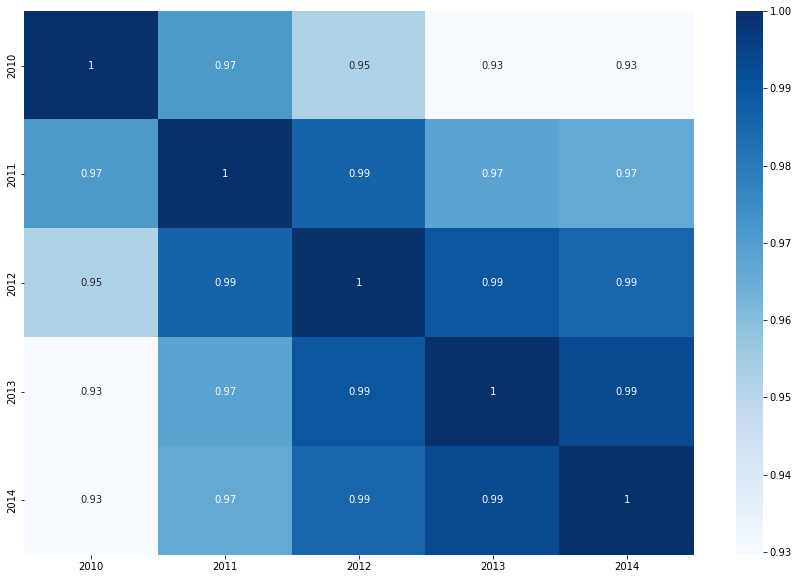

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues').get_figure().savefig('correlation_heatmap.png')

-Од горенаведената 'correlation heatmap' можеме да заклучиме дека постои голема корелација помеѓу податоците

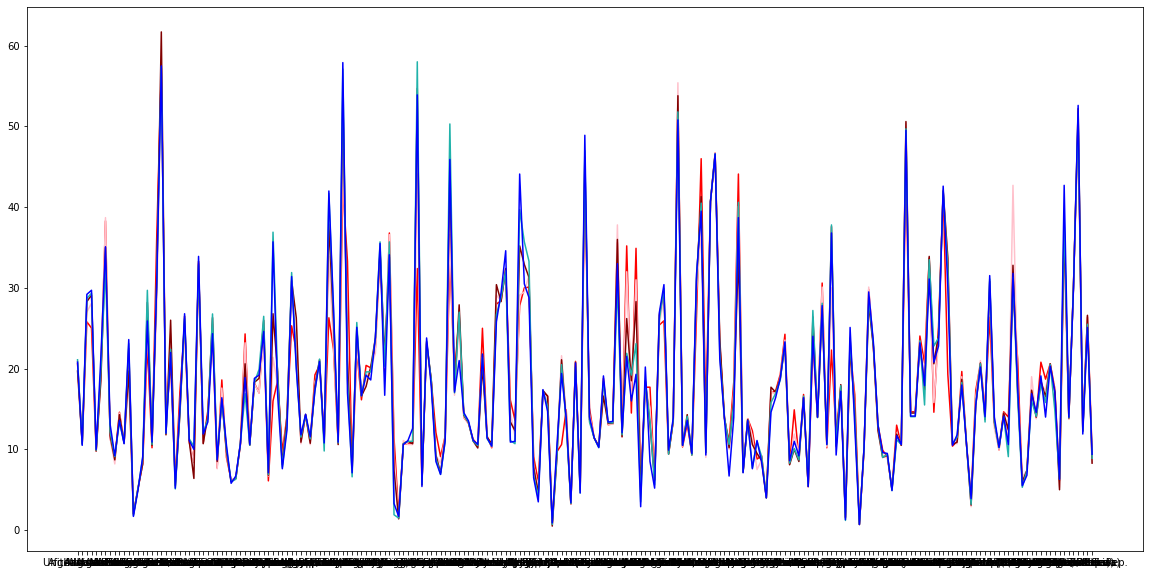

In [ ]:
#Complete Data exploration
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
x=data['Country Name']
plt.plot(x,data['2010'],'r',label='In 2010')
plt.plot(x,data['2011'],'pink',label='In 2011')
plt.plot(x,data['2012'],'maroon',label='In 2012')
plt.plot(x,data['2013'],'lightseagreen',label='In 2013')
plt.plot(x,data['2014'],'b',label='In 2013')

Ако земе за пример податоци за државите во Европа.

---



In [ ]:
df = data.copy()

In [ ]:
European_countries = ['Albania','Andorra','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Czech Republic',
'Denmark','Estonia','Faroe Islands','Finland','France','Germany','Gibraltar','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia',
'Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russia',
'San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom','Vatican City']


In [ ]:
European = df[df['Country Name'].isin(European_countries)]
European.insert(0, 'Continent', 'Europe')

In [ ]:
European

Continent            Country Name Country Code       2010       2011  \
2      Europe                 Albania          ALB  25.799999  27.000000   
8      Europe                 Austria          AUT   8.800000   8.200000   
11     Europe                 Belgium          BEL  22.500000  18.600000   
15     Europe                Bulgaria          BGR  22.900000  25.200001   
18     Europe  Bosnia and Herzegovina          BIH  57.200001  57.099998   
19     Europe                 Belarus          BLR  13.200000  12.500000   
30     Europe             Switzerland          CHE   7.700000   7.600000   
43     Europe          Czech Republic          CZE  18.500000  17.900000   
44     Europe                 Germany          DEU   9.700000   8.400000   
45     Europe                 Denmark          DNK  14.100000  14.300000   
57     Europe                   Spain          ESP  42.500000  47.099998   
58     Europe                 Estonia          EST  33.299999  22.600000   
62     Europe                 Finland          FIN  20.400000  18.900000   
64     Europe                  France          FRA  22.600000  21.900000   
66     Europe          United Kingdom          GBR  19.600000  20.100000   
73     Europe                  Greece          GRC  32.400002  44.099998   
80     Europe                 Croatia          HRV  33.500000  36.599998   
82     Europe                 Hungary          HUN  26.600000  26.000000   
90     Europe                 Ireland          IRL  28.000000  29.100000   
93     Europe                 Iceland          ISL  16.100000  14.600000   
95     Europe                   Italy          ITA  27.799999  29.100000   
118    Europe               Lithuania          LTU  35.200001  32.000000   
119    Europe              Luxembourg          LUX  14.500000  16.799999   
120    Europe                  Latvia          LVA  34.900002  31.000000   
123    Europe                 Moldova          MDA  17.700001  15.100000   
131    Europe                   Malta          MLT  13.200000  14.000000   
134    Europe              Montenegro          MNE  46.000000  37.200001   
146    Europe             Netherlands          NLD   8.800000   7.500000   
147    Europe                  Norway          NOR   9.200000   8.700000   
158    Europe                  Poland          POL  23.400000  25.500000   
162    Europe                Portugal          PRT  22.299999  30.000000   
166    Europe                 Romania          ROU  22.299999  23.900000   
178    Europe                  Serbia          SRB  45.500000  50.400002   
184    Europe                Slovenia          SVN  14.600000  15.800000   
185    Europe                  Sweden          SWE  25.200001  23.200001   
205    Europe                 Ukraine          UKR  17.400000  19.000000   

          2012       2013       2014  
2    28.299999  28.700001  29.200001  
8     8.700000   9.100000   9.200000  
11   19.700001  23.100000  23.600000  
15   28.200001  29.700001  25.900000  
18   61.700001  57.400002  57.500000  
19   11.800000  12.000000  12.000000  
30    8.500000   8.800000   8.700000  
43   19.600000  18.900000  16.700001  
44    8.100000   7.800000   7.600000  
45   14.100000  13.000000  12.400000  
57   54.299999  57.099998  57.900002  
58   21.000000  18.700001  17.000000  
62   17.799999  19.600000  19.200001  
64   23.799999  23.700001  23.900000  
66   21.400000  20.299999  16.700001  
73   54.700001  58.000000  53.900002  
80   44.099998  50.299999  45.900002  
82   27.900000  27.000000  21.000000  
90   30.400000  26.700001  25.799999  
93   13.400000  11.100000  10.900000  
95   35.200001  39.700001  44.099998  
118  26.200001  21.900000  21.500000  
119  18.500000  19.200001  16.000000  
120  28.299999  23.100000  19.299999  
123  13.100000  13.500000   8.500000  
131  14.300000  14.100000  13.600000  
134  41.299999  40.500000  39.500000  
146   9.500000  11.000000  11.100000  
147   8.600000   9.100000   8.400000  
158  26.400000  27.20

In [ ]:
eu = European.copy()

In [ ]:
eu = eu.drop('Country Code', axis=1)


In [ ]:
eu = eu.drop('Continent', axis=1)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = eu.drop('Country Name', axis=1).values
y = eu['Country Name'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


3.Поделба на податоците и Нормализирање

*KNN*

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
                precision    recall  f1-score   support

       Albania       0.00      0.00      0.00       0.0
       Austria       0.00      0.00      0.00       0.0
       Belgium       0.00      0.00      0.00       1.0
Czech Republic       0.00      0.00      0.00       1.0
       Denmark       0.00      0.00      0.00       0.0
       Finland       0.00      0.00      0.00       0.0
       Ireland       0.00      0.00      0.00       1.0
         Italy       0.00      0.00      0.00       1.0

*XGBOOST*

In [ ]:
#Поделба на датасетот на Training и Test set
X = eu.drop('Country Name', axis=1).values
y = eu['Country Name'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#Тренирање на XGBoost моделот на Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth= 10, n_estimators= 125, random_state= 0,  learning_rate= 0.02, n_jobs=5)
classifier.fit(X_train, y_train)

XGBClassifier(learning_rate=0.02, max_depth=10, n_estimators=125, n_jobs=5,
              objective='multi:softprob')

In [ ]:
#Предвидување на Test set резултатите
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Albania' 'Ukraine']
 ['Albania' 'France']
 ['Albania' 'Montenegro']
 ['Albania' 'Portugal']
 ['Albania' 'Croatia']
 ['Albania' 'Romania']
 ['Albania' 'Lithuania']
 ['Albania' 'Finland']
 ['Albania' 'Germany']
 ['Albania' 'Hungary']
 ['Albania' 'Denmark']]


In [ ]:
#Евалуирање на моделот
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]


0.0

*Decision Tree*

In [ ]:
#Градење на моделот

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X = eu.drop('Country Name', axis=1).values
y = eu['Country Name'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Евалуирање на моделот

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [ ]:
from sklearn.model_selection import train_test_split
X = eu.drop('Country Name', axis=1).values
y = eu['Country Name'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


*Naive bayes *

In [ ]:
# Градење на моделот
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild

In [ ]:
#Евалуирање на моделот

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
                precision    recall  f1-score   support

       Croatia       0.00      0.00      0.00       1.0
Czech Republic       0.00      0.00      0.00       0.0
       Denmark       0.00      0.00      0.00      

Согледување на податоците

In [ ]:
def select_highest_rate(continent, year):
    highest_rate_idx = continent[year].idxmax()
    return continent.loc[highest_rate_idx]

def select_lowest_rate(continent, year):
    lowest_rate_idx = continent[year].idxmin()
    return continent.loc[lowest_rate_idx]

In [ ]:
print(select_highest_rate(European, '2014'))



Continent          Europe
Country Name        Spain
Country Code          ESP
2010                 42.5
2011            47.099998
2012            54.299999
2013            57.099998
2014            57.900002
Name: 57, dtype: object


In [ ]:
print(select_lowest_rate(European, '2014'))


Continent        Europe
Country Name    Germany
Country Code        DEU
2010                9.7
2011                8.4
2012                8.1
2013                7.8
2014                7.6
Name: 44, dtype: object
